<a href="https://colab.research.google.com/github/mgmboyd/DataAnalytics-Project3/blob/master/2018_2020_Project_3_Team_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analytics - Project 3 Team 7**

In [258]:
# LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import plotly.express as px
import seaborn as sns
sns.set()
!pip install sodapy

# **DATA GATHERING**

In [259]:
df = pd.read_csv('https://raw.githubusercontent.com/mgmboyd/DataAnalytics-Project3/master/Harlem_covid_cases_project%20-%20V.4.csv')

In [260]:
df.shape

(839, 36)

In [261]:
df.head()

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,collection_dept,admit_status,admit_status_id,service,service_id,unit_room,mrn,age,mortality_status,abnormality,abnormal,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,collected_time,isolation_status,lab_status,result_date,result_time,discharge_date,gender,zip_code,primary_problem,visit_count
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,HA IP 11SU,No,0,Medicine,122,HA 11SU 11-111,1,83.0,Deceased,Abnormal,Abnormal,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,1059,Not reported,Final result,4/15/2020,11:07:20 AM,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,HA IP 13MD,No,0,Medicine,122,HA 14MD 14-121,2,81.0,Not Deceased,Abnormal,Abnormal,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,1305,Not reported,Final result,3/30/2020,1:09:12 PM,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,HA IP 13MD,No,0,Medicine,122,HA 14MD 14-111,3,84.0,Not Deceased,Panic,Abnormal,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,1713,Not reported,Final result,3/26/2020,6:02:40 PM,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1
3,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 14MD,1012007050,Discharged,300,HA IP 14MD,No,0,Medicine,122,HA 14MD 14-111,4,84.0,Not Deceased,Abnormal,Abnormal,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/25/2020,1653,Not reported,Final result,3/26/2020,2:33:16 PM,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1
4,HARLEM HOSPITAL CENTER,2/13/2020,February,2020,HA IP 13MD,1012007040,Discharged,300,HA IP 13MD,Yes,1,Surgery,124,HA 13MD 13-142,5,62.0,Not Deceased,Abnormal,Abnormal,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,Inconclusive,Inconclusive,Nasopharyngeal,4/7/2020,1523,Not reported,Final result,4/10/2020,5:01:52 PM,4/28/2020,M,10037,C1-C4 level spinal cord injury (HCC) (Principa...,1


In [262]:
df.tail()

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,collection_dept,admit_status,admit_status_id,service,service_id,unit_room,mrn,age,mortality_status,abnormality,abnormal,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,collected_time,isolation_status,lab_status,result_date,result_time,discharge_date,gender,zip_code,primary_problem,visit_count
834,HARLEM HOSPITAL CENTER,7/29/2020,July,2020,HA ED PEDIATRIC,1012006020,ED Discharged,200,HA ED PEDIATRIC,No,0,Emergency,123,HA EDPED PED3,835,19.0,Not Deceased,Abnormal,Abnormal,COVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,7/29/2020,301,Not reported,Final result,8/2/2020,4:03:33 PM,7/29/2020,F,10027,None,1
835,HARLEM HOSPITAL CENTER,8/2/2020,August,2020,HA ED ADULT,1012006030,Admitted,100,HA ED ADULT,Yes,1,Medicine,122,HA 14MD 14-114,836,53.0,Not Deceased,Abnormal,Abnormal,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,Nasopharyngeal Swab,8/2/2020,1846,Contact and Droplet,Final result,8/2/2020,8:04:59 PM,NaN,F,10027,Pneumonia of both lower lobes due to infectiou...,1
836,HARLEM HOSPITAL CENTER,8/3/2020,August,2020,HA ED ADULT,1012006030,Discharged,300,HA ED ADULT,No,0,Medicine,122,HA 13MD 13-122,837,55.0,Not Deceased,Abnormal,Abnormal,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,Nasopharyngeal Swab,8/3/2020,1938,Contact and Droplet,Final result,8/3/2020,9:28:50 PM,8/4/2020,F,10030,Lactic acidosis (Additional Hospital Problems),1
837,HARLEM HOSPITAL CENTER,8/7/2020,August,2020,HA ED ADULT,1012006030,Admitted,100,HA ED ADULT,Yes,1,Medicine,122,HA 14MD 14-143,838,30.0,Not Deceased,Abnormal,Abnormal,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,Nasopharyngeal Swab,8/7/2020,444,Contact and Airborne,Final result,8/7/2020,6:07:13 AM,NaN,M,10029,Lung abnormality,1
838,HARLEM HOSPITAL CENTER,3/15/2020,March,2020,HA ED ADULT,1012006030,ED Dismissed,800,HA ED ADULT,No,0,Emergency,123,HA EDADL,839,35.0,Not Deceased,Panic,Abnormal,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/15/2020,1334,Not reported,Final result,3/18/2020,1:16:21 PM,3/15/2020,M,10031,None,1


In [263]:
df.columns

Index(['facility', 'admit_date', 'month', 'year', 'encounter_dept', 'dept_id',
       'encounter_type', 'encounter_type_id', 'collection_dept',
       'admit_status', 'admit_status_id', 'service', 'service_id', 'unit_room',
       'mrn', 'age', 'mortality_status', 'abnormality', 'abnormal',
       'component ', 'procedure', 'lab_id', 'infection_status', 'value',
       'specimen_type', 'collected_date', 'collected_time', 'isolation_status',
       'lab_status', 'result_date', 'result_time', 'discharge_date', 'gender',
       'zip_code', 'primary_problem', 'visit_count'],
      dtype='object')

In [264]:
df.dtypes

facility              object
admit_date            object
month                 object
year                   int64
encounter_dept        object
dept_id                int64
encounter_type        object
encounter_type_id      int64
collection_dept       object
admit_status          object
admit_status_id        int64
service               object
service_id             int64
unit_room             object
mrn                    int64
age                  float64
mortality_status      object
abnormality           object
abnormal              object
component             object
procedure             object
lab_id                object
infection_status      object
value                 object
specimen_type         object
collected_date        object
collected_time         int64
isolation_status      object
lab_status            object
result_date           object
result_time           object
discharge_date        object
gender                object
zip_code               int64
primary_proble

# **DATA WRANGLING**

In [265]:
# Drop columns
ha_df = df.drop(columns=['unit_room', 'mortality_status', 'abnormality', 'abnormal', 
                         'collection_dept','collected_time','result_time', 'lab_status'])
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1


In [266]:
# Adding column with total cases by admit date
ha_df['sum_cases'] = df.groupby('admit_date')['visit_count'].transform(np.sum)
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count,sum_cases
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1,1
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1,2


In [267]:
# Create column (month_id) with numerical value for months
ha_df['month_id'] = pd.DatetimeIndex(ha_df['admit_date']).month
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count,sum_cases,month_id
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1,1,12
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1,1,11
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1,2,1


In [268]:
# Copying 'value' column
ha_df['value_id'] = ha_df['value']

In [269]:
# Changing string values to integers for plotting purposes
ha_df['value_id'].replace('Positive', 1, inplace=True)
ha_df['value_id'].replace('Inconclusive', 0, inplace=True)
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count,sum_cases,month_id,value_id
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1,1,12,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1,1,11,1
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1,2,1,1


In [270]:
# Copying "gender" column
ha_df['gender_id'] = ha_df['gender']

In [271]:
# # Changing string values to integers for plotting purposes
ha_df['gender_id'].replace('F', 1, inplace=True)
ha_df['gender_id'].replace('M', 2, inplace=True)
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count,sum_cases,month_id,value_id,gender_id
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1,1,12,1,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1,1,11,1,2
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1,2,1,1,1


In [272]:
# Change data type to date/time
ha_df['admit_date'] = pd.to_datetime(ha_df['admit_date'])

In [273]:
# Change data type to date/time
ha_df['discharge_date'] = pd.to_datetime(ha_df['discharge_date'])

In [274]:
# Change data type to date/time
ha_df['collected_date'] = pd.to_datetime(ha_df['collected_date'])

In [275]:
# Change data type to date/time
ha_df['result_date'] = pd.to_datetime(ha_df['result_date'])

In [276]:
pd.DatetimeIndex(ha_df['admit_date']).month

Int64Index([12, 11,  1,  1,  2,  2,  2,  3,  3,  3,
            ...
             7,  7,  7,  7,  7,  7,  8,  8,  8,  3],
           dtype='int64', name='admit_date', length=839)

In [277]:
# Check changes made
ha_df.dtypes

facility                     object
admit_date           datetime64[ns]
month                        object
year                          int64
encounter_dept               object
dept_id                       int64
encounter_type               object
encounter_type_id             int64
admit_status                 object
admit_status_id               int64
service                      object
service_id                    int64
mrn                           int64
age                         float64
component                    object
procedure                    object
lab_id                       object
infection_status             object
value                        object
specimen_type                object
collected_date       datetime64[ns]
isolation_status             object
result_date          datetime64[ns]
discharge_date       datetime64[ns]
gender                       object
zip_code                      int64
primary_problem              object
visit_count                 

In [278]:
# Sort columns in desired order
ha_df = ha_df[['facility', 'sum_cases', 'visit_count', 'mrn', 'age', 'gender', 'gender_id','zip_code', 'primary_problem', 
               'isolation_status', 'admit_status','admit_status_id', 'service', 
              'service_id', 'admit_date', 'month', 'month_id', 'year', 'discharge_date', 
               'encounter_dept', 'dept_id', 'encounter_type', 
              'encounter_type_id', 'component ', 'procedure', 'lab_id', 'infection_status', 'value', 'value_id', 
              'specimen_type', 'collected_date', 'result_date']]

In [279]:
cols = list(ha_df.columns.values)

In [280]:
# Checked sorted columns
ha_df.head(2)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30


In [281]:
# Data sorted by column "admit date"
ha_df.sort_values(['year','admit_date'], ascending=(True,True))
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26


In [282]:
# Determining unique value for column "value"
ha_df['value'].unique()

array(['Positive', 'Inconclusive'], dtype=object)

In [283]:
# Determining unique values for column "specimen_type"
ha_df.specimen_type.unique()

array(['Nasopharyngeal', 'NP/OP Swab', 'Nasopharyngeal Swab',
       'Anterior Nares'], dtype=object)

In [ ]:
# Determining unique value for column "primary_problem"
ha_df.primary_problem.unique()

In [285]:
# Determining unique value for column "primary_problem"
ha_df.infection_status.unique()

array(['COVID-19 (confirmed)', 'Inconclusive'], dtype=object)

# **DATA ANALYSIS - Part 1**

In [286]:
# Determining length of stay (LOS) for positive patients in Harlem
ha_df['los'] = ha_df['discharge_date'] - ha_df['admit_date']
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days


In [287]:
ha_df['los_num'] = ha_df.los.apply(lambda x: x.days)
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0


In [288]:
ha_df_dis_df = ha_df[ha_df['los_num'].isnull()==False]
ha_df_dis_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0


In [289]:
ha_df_dis_df.los_num.dtype

dtype('float64')

In [290]:
ha_df_dis_df['los_num'] = ha_df_dis_df['los_num'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [291]:
ha_df_dis_df['los_num'] = ha_df_dis_df.los_num.apply(lambda x: x+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [292]:
ha_df_dis_df.los_num.dtype

dtype('int64')

In [293]:
ha_df_dis_df.tail(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num
834,HARLEM HOSPITAL CENTER,1,1,835,19.0,F,1,10027,None,Not reported,No,0,Emergency,123,2020-07-29,July,7,2020,2020-07-29,HA ED PEDIATRIC,1012006020,ED Discharged,200,COVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-07-29,2020-08-02,0 days,1
836,HARLEM HOSPITAL CENTER,1,1,837,55.0,F,1,10030,Lactic acidosis (Additional Hospital Problems),Contact and Droplet,No,0,Medicine,122,2020-08-03,August,8,2020,2020-08-04,HA ED ADULT,1012006030,Discharged,300,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,1,Nasopharyngeal Swab,2020-08-03,2020-08-03,1 days,2
838,HARLEM HOSPITAL CENTER,4,1,839,35.0,M,2,10031,None,Not reported,No,0,Emergency,123,2020-03-15,March,3,2020,2020-03-15,HA ED ADULT,1012006030,ED Dismissed,800,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-15,2020-03-18,0 days,1


In [294]:
# Determining lab result turnaround time (collected_date - result_date)
ha_df['lab_time'] = ha_df['result_date'] - ha_df['collected_date']
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num,lab_time
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0,9 days
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0,7 days
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0,7 days


In [295]:
ha_df['lab_time_num'] = ha_df.lab_time.apply(lambda x: x.days)
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num,lab_time,lab_time_num
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0,9 days,9
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0,7 days,7
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0,7 days,7


In [296]:
ha_df_lab_df = ha_df[ha_df['lab_time_num'].isnull()==False]
ha_df_lab_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num,lab_time,lab_time_num
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0,9 days,9
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0,7 days,7
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0,7 days,7


In [297]:
ha_df_lab_df.lab_time_num.dtype

dtype('int64')

In [298]:
ha_df_lab_df['lab_time_num'] = ha_df_lab_df['lab_time_num'].astype(int)

In [299]:
ha_df_lab_df['lab_time_num'] = ha_df_lab_df.lab_time_num.apply(lambda x: x+1)

In [300]:
ha_df_lab_df.lab_time_num.dtype

dtype('int64')

In [301]:
ha_df_lab_df.tail(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num,lab_time,lab_time_num
836,HARLEM HOSPITAL CENTER,1,1,837,55.0,F,1,10030,Lactic acidosis (Additional Hospital Problems),Contact and Droplet,No,0,Medicine,122,2020-08-03,August,8,2020,2020-08-04,HA ED ADULT,1012006030,Discharged,300,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,1,Nasopharyngeal Swab,2020-08-03,2020-08-03,1 days,1.0,0 days,1
837,HARLEM HOSPITAL CENTER,1,1,838,30.0,M,2,10029,Lung abnormality,Contact and Airborne,Yes,1,Medicine,122,2020-08-07,August,8,2020,NaT,HA ED ADULT,1012006030,Admitted,100,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,1,Nasopharyngeal Swab,2020-08-07,2020-08-07,NaT,NaN,0 days,1
838,HARLEM HOSPITAL CENTER,4,1,839,35.0,M,2,10031,None,Not reported,No,0,Emergency,123,2020-03-15,March,3,2020,2020-03-15,HA ED ADULT,1012006030,ED Dismissed,800,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-15,2020-03-18,0 days,0.0,3 days,4


In [302]:
# Deteriming number of positive patients by date
ha_df.pivot_table(index='admit_date',values='visit_count',aggfunc='count')

,visit_count
admit_date,
2018-12-22,1
2019-11-13,1
2020-01-21,2
2020-02-13,1
2020-02-26,2
...,...
2020-07-27,1
2020-07-29,1
2020-08-02,1


In [303]:
# Sort columns in desired order
ha_df = ha_df[['facility', 'sum_cases', 'visit_count', 'mrn', 'age', 'gender', 'gender_id','zip_code', 'primary_problem', 'isolation_status', 'admit_status','admit_status_id', 'service', 
              'service_id', 'admit_date', 'month', 'month_id', 'year', 'discharge_date', 'los', 'los_num', 'encounter_dept', 'dept_id', 'encounter_type', 
              'encounter_type_id', 'component ', 'procedure', 'lab_id', 'infection_status', 'value', 'value_id', 
              'specimen_type', 'collected_date', 'result_date']]
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,los,los_num,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,475 days,475.0,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,164 days,164.0,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,81 days,81.0,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26


In [304]:
# Determining sum total of column 'visit_count'
ha_df['visit_count'].sum()

839

In [305]:
# Data is sorted by 'gender' column to analyze how many patients were male or female
ha_df.pivot_table(index='gender',values='visit_count',aggfunc='count')

,visit_count
gender,
F,360
M,479


In [306]:
# Data is sorted by Specimen type taken from each patient
ha_df.pivot_table(index='specimen_type',values='visit_count',aggfunc='count')

,visit_count
specimen_type,
Anterior Nares,1
NP/OP Swab,36
Nasopharyngeal,655
Nasopharyngeal Swab,147


In [307]:
# Determining number of patients using column 'visit_count' by 'encounter_dept' column
ha_df.pivot_table(index='encounter_dept',values='visit_count',aggfunc='count')

,visit_count
encounter_dept,
HA ED ADULT,634
HA ED PEDIATRIC,11
HA ED PSYCH,2
HA INTRA-OP,3
HA IP 11SU,24
HA IP 12MD,16
HA IP 13MD,46
HA IP 14MD,29
HA IP 15CC,5


In [308]:
# Number of positive cases per month
ha_df.groupby('month_id')['visit_count'].sum()

month_id
1       2
2       3
3     263
4     441
5      73
6      36
7      16
8       3
11      1
12      1
Name: visit_count, dtype: int64

In [309]:
# Data is sorted by 'gender_id' column to analyze how many patients were male or female
ha_df1 = ha_df.groupby('gender_id')['visit_count'].sum()
print(ha_df1)

gender_id
1    360
2    479
Name: visit_count, dtype: int64


In [310]:
# Determining number of positive patients by age
ha_df.pivot_table(index='age',values='visit_count',aggfunc='count')

,visit_count
age,
0.92,1
1.17,1
9.00,2
14.00,1
17.00,1
...,...
93.00,5
94.00,9
95.00,4


In [311]:
# Determining the mean of 'age' column
ha_df['age'].mean()

63.16578069129916

In [312]:
# What is the standard deviation by "age"
ha_df['age'].std()

17.69028213953049

In [313]:
# what is the age of the oldest patient that tested positive in Harlem to date
ha_df['age'].max()

97.0

In [314]:
# what is the age of the youngest patient that tested positive in Harlem to date
ha_df['age'].min()

0.92

In [315]:
# How many positive patients have primary problems at the time they were admitted?
ha_df.pivot_table(index='primary_problem',values='visit_count',aggfunc='count')

,visit_count
primary_problem,
2019 novel coronavirus detected (Principal Hospital Problem),1
2019 novel coronavirus disease (COVID-19) (Principal Hospital Problem),2
40 weeks gestation of pregnancy (Additional Hospital Problems),1
?COPD/Asthma,1
A-fib (HCC) (Additional Hospital Problems),1
...,...
Unsteady gait,1
Upper respiratory tract infection (Additional Hospital Problems),1
Viral pneumonia (Additional Hospital Problems),2


In [316]:
# Total number of cases by admission date
total_cases = ha_df.groupby('admit_date').sum()['sum_cases']
total_cases.head(3)

admit_date
2018-12-22    1
2019-11-13    1
2020-01-21    4
Name: sum_cases, dtype: int64

# **DATA ANALYSIS - Part 2**

### *Setting up Data Frames for EDA*

In [317]:
ha_df.dtypes

facility                      object
sum_cases                      int64
visit_count                    int64
mrn                            int64
age                          float64
gender                        object
gender_id                      int64
zip_code                       int64
primary_problem               object
isolation_status              object
admit_status                  object
admit_status_id                int64
service                       object
service_id                     int64
admit_date            datetime64[ns]
month                         object
month_id                       int64
year                           int64
discharge_date        datetime64[ns]
los                  timedelta64[ns]
los_num                      float64
encounter_dept                object
dept_id                        int64
encounter_type                object
encounter_type_id              int64
component                     object
procedure                     object
l

In [318]:
ha_cases = ha_df['sum_cases']
ha_dates = ha_df['month_id']
ha_age = ha_df['age']
ha_gender = ha_df['gender']
ha_genderid = ha_df['gender_id']
ha_visitcount = ha_df['visit_count']
ha_month = ha_df['month_id']
ha_losnum = ha_df['los_num']
ha_zip = ha_df['zip_code']
ha_encid = ha_df['encounter_type_id']
ha_deptid = ha_df['dept_id']
ha_svcid = ha_df['service_id']
ha_value = ha_df['value_id']

### *Exploratory Data Analysis - Scatter Plots*

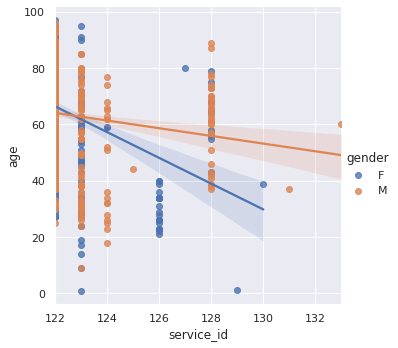

In [319]:
# Regression Analysis showing corelation between age, gender and patient service department:
sns.lmplot(data=ha_df, x='service_id', y='age', hue='gender')

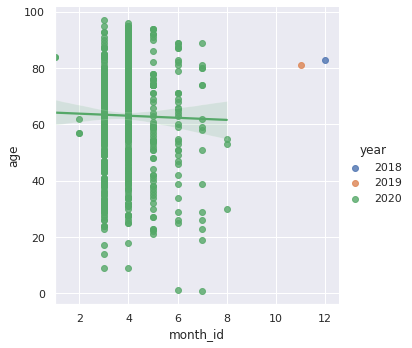

In [320]:
# Regression Analysis showing corelation between age, month, and year:
sns.lmplot(data=ha_df, x='month_id', y='age', hue='year')

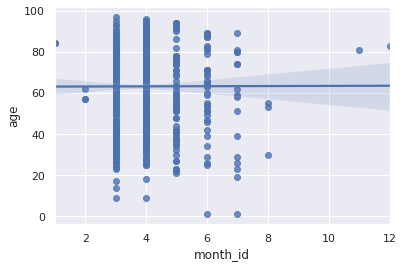

In [147]:
# Regression Analysis showing corelation between age and month:
sns.regplot(x='month_id',y='age', data=ha_df)

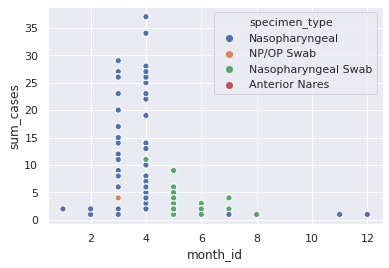

In [187]:
ax = sns.scatterplot(x="month_id", y="sum_cases",hue="specimen_type",data=ha_df)

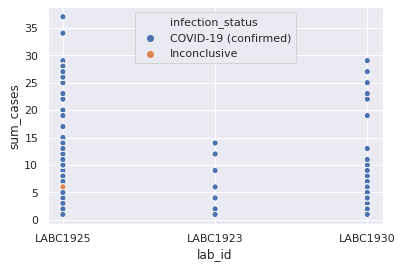

In [188]:
ax = sns.scatterplot(x="lab_id", y="sum_cases", hue="infection_status",
                     data=ha_df)

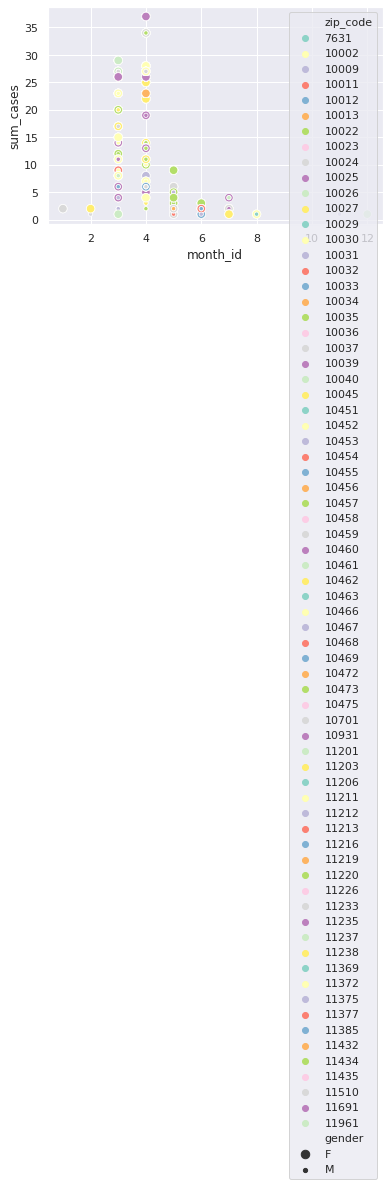

In [189]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="month_id", y="sum_cases", hue="zip_code", size="gender",
                     palette="Set3",
                     data=ha_df)

### *Exploratory Data Analysis - Box Plots*




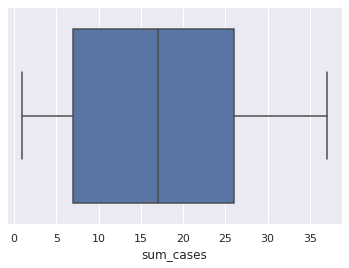

In [191]:
ax = sns.boxplot(x=ha_df["sum_cases"])

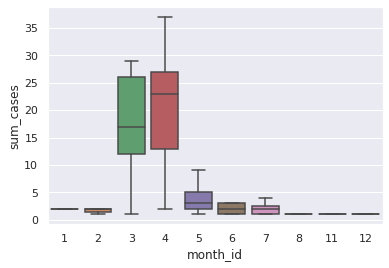

In [192]:
ax = sns.boxplot(x="month_id", y="sum_cases", data=ha_df)

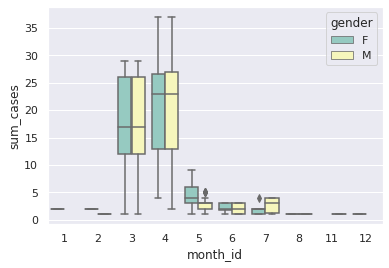

In [193]:
ax = sns.boxplot(x="month_id", y="sum_cases", hue="gender", data=ha_df, palette="Set3")

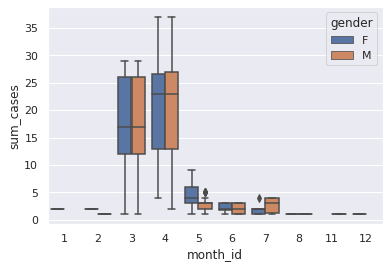

In [194]:
ax = sns.boxplot(x="month_id", y="sum_cases", hue="gender", data=ha_df)

### *Exploratory Data Analysis - Joint Plots*

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

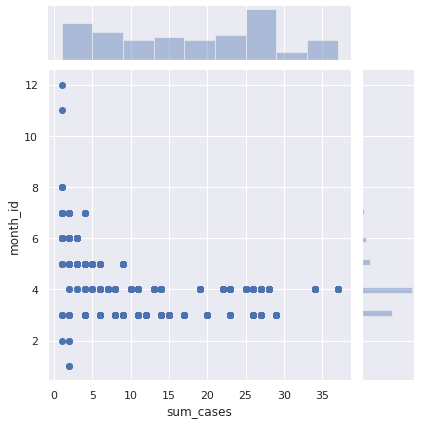

In [195]:
ax = sns.jointplot(x="sum_cases", y="month_id", data=ha_df)

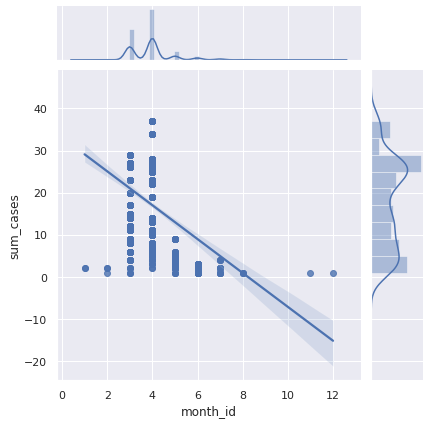

In [197]:
ax = sns.jointplot("month_id","sum_cases", data=ha_df, kind="reg")

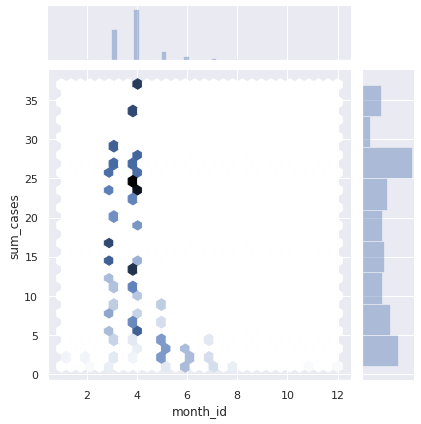

In [198]:
ax = sns.jointplot("month_id","sum_cases", data=ha_df, kind="hex")

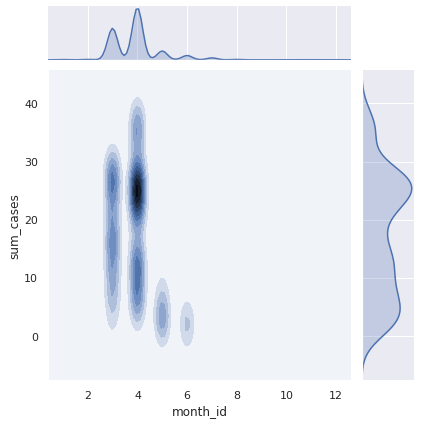

In [199]:
ax = sns.jointplot("month_id","sum_cases", data=ha_df, kind="kde")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning:


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning:


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1134: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1163: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/matplotl

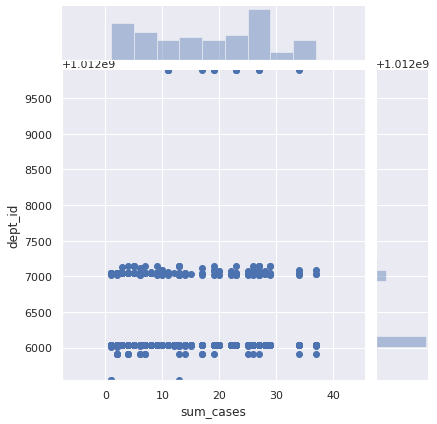

In [208]:
ax = (sns.jointplot("sum_cases","dept_id", data=ha_df).plot_joint(sns.kdeplot,n_levels=6))

### *Exploratory Data Analysis - Bar Plots 1*

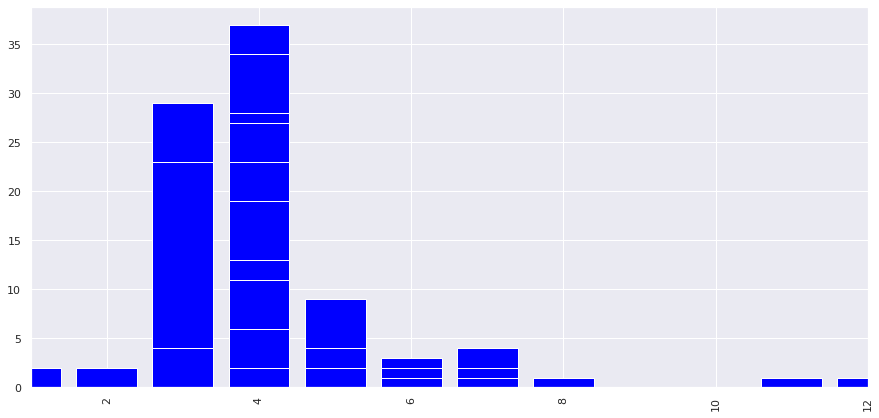

In [148]:
plt.figure(figsize=(15,7))
plt.bar(x=ha_dates, height=ha_cases, color='blue')
plt.xticks(rotation=90)
plt.xlim(1,12)
plt.show()

### *Exploratory Data Analysis - Bar Plots 2*

In [152]:
pt_data_discharge = ha_df_dis_df.los_num.value_counts()

In [ ]:
type(pt_data_discharge)

In [ ]:
pt_discharge_df = pd.DataFrame(pt_data_dischage)
pt_discharge_df.head()

In [229]:
pt_discharge_df = pt_discharge_df.reset_index()

In [230]:
pt_discharge_df_final = pt_discharge_df.rename(columns={'index':'los_days'})

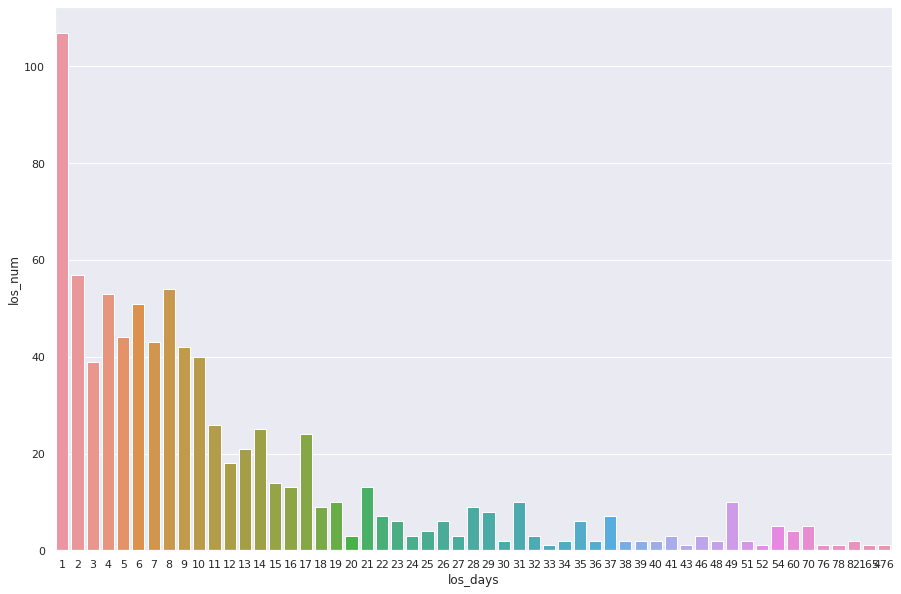

In [157]:
plt.figure(figsize=(15,10))
sns.barplot(data=pt_discharge_df_final,x='los_days', y='los_num')

### *Exploratory Data Analysis - Scatterplot*

In [162]:
import numpy
import matplotlib.pyplot as pl

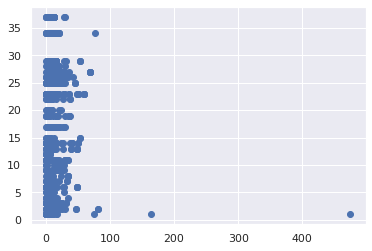

In [159]:
# LOS and Sum of cases
plt.scatter(ha_losnum, ha_cases)
plt.show()

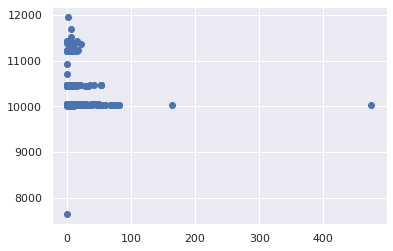

In [160]:
# LOS and Zip
plt.scatter(ha_losnum, ha_zip)
plt.show()

In [ ]:
ha_df['los_num'].mean()

In [ ]:
ha_df['los_num'].std()

In [ ]:
ha_df['los_num'].max()

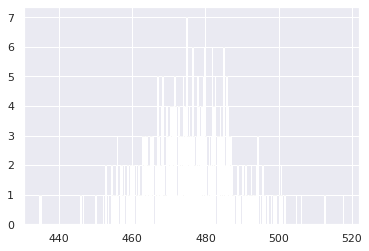

In [166]:
ha_losnum = numpy.random.normal(475.0, 11.74, 475)

plt.hist(ha_losnum, 500, color='black')
plt.show()

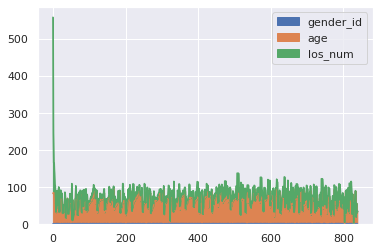

In [168]:
df = pd.DataFrame(ha_df, columns=['gender_id', 'age', 'los_num'])
df.plot.area()

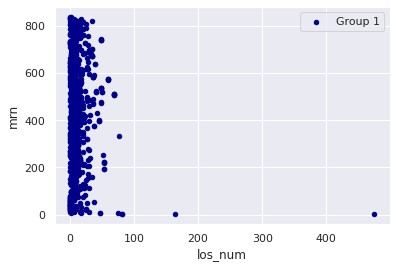

In [169]:
ha_df.plot.scatter(x='los_num', y='mrn', color='DarkBlue', label='Group 1')

In [ ]:
df1 = ha_df.pivot_table(index='gender',values='visit_count',aggfunc='count')
df1

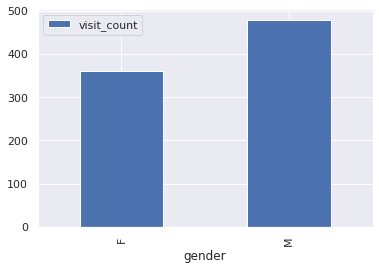

In [171]:
df1.plot(kind='bar')

In [ ]:
df2 = ha_df.pivot_table(index='encounter_dept',values='visit_count',aggfunc='count')
df2

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

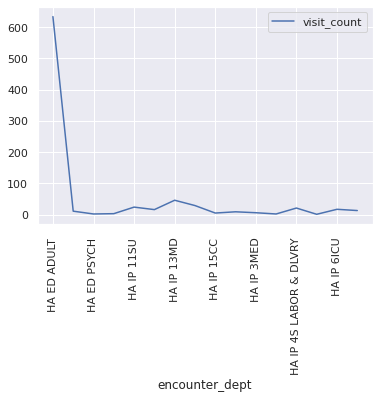

In [231]:
df2.plot(kind='bar')
plt.xticks(rotation=90)

In [ ]:
df3 = ha_df.groupby('month_id')['value_id'].sum()
df3

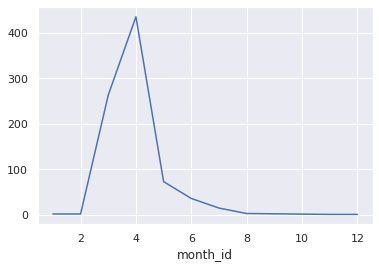

In [175]:
df3.plot(kind='line')
plt.show()

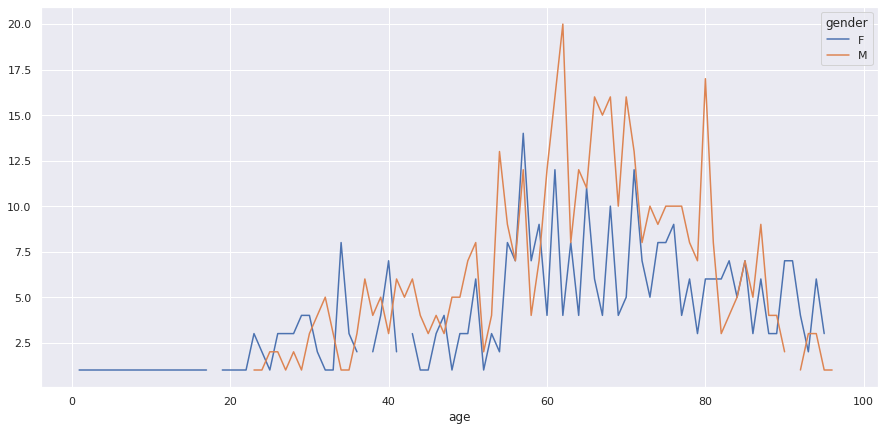

In [176]:
fig, ax = plt.subplots(figsize=(15,7))
ha_df.groupby(['age','gender']).count()['los_num'].unstack().plot(ax=ax)

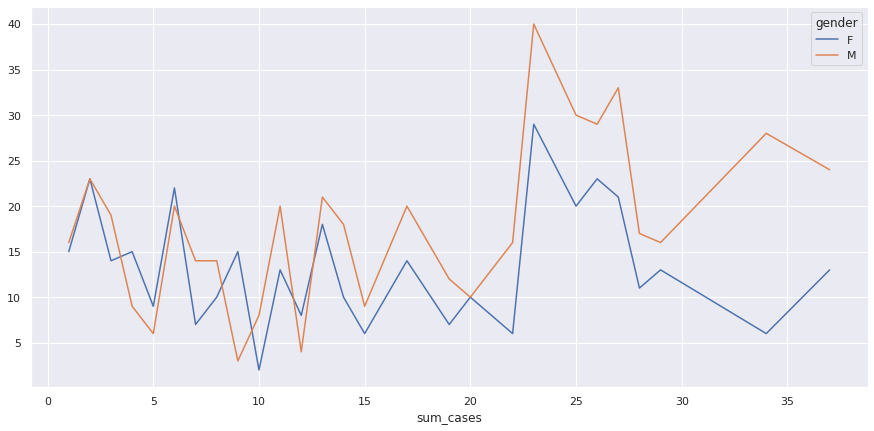

In [178]:
fig, ax = plt.subplots(figsize=(15,7))
ha_df.groupby(['sum_cases','gender']).count()['month'].unstack().plot(ax=ax)

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

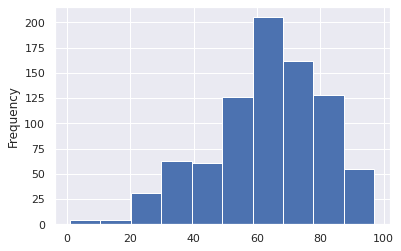

In [179]:
ha_df['age'].plot.hist()

In [ ]:
correlations = ha_df.corr()
correlations = correlations['value_id']
print(correlations)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


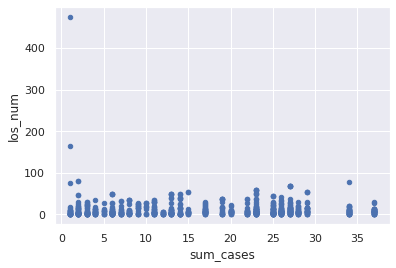

In [181]:
ha_df.plot.scatter(x='sum_cases', y='los_num')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


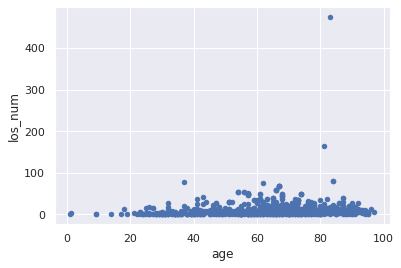

In [182]:
ha_df.plot.scatter(x='age', y='los_num')